In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

path = os.getcwd()

#loading in the data

loads = pd.read_csv(path + '/GEFCOM/Load_history.csv') 
{tempvsload
def replace_fun(x) : 
    try : 
        return(int(x.replace(',','')))
    except :
        return(x)

for col in loads.columns :
    loads[col] = loads[col].apply(lambda x : replace_fun(x)) 
    
loads['date'] = pd.to_datetime((loads.year*10000+loads.month*100+loads.day).apply(str),format='%Y%m%d')
 
##get rid of first dy fo     
{tempvsload
temps =  pd.read_csv(path + '/GEFCOM/temperature_history.csv')

loads.columns =  "load_"+ loads.columns 
temps.columns =  "temp_"+ temps.columns 
#temps = temps[temps['temp_station_id'] == 1]

df = pd.merge(left = loads,right = temps,left_on = ['load_year','load_month','load_day'],how ='left',
              right_on = ['temp_year','temp_month','temp_day'])

### remove nan rows
df = df[-pd.isnull(df['load_h24'])]
loads = loads[-pd.isnull(loads['load_h24'])]
temps = temps[-pd.isnull(temps['temp_h24'])]

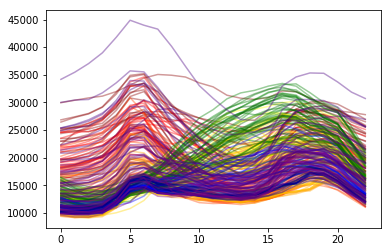

In [3]:
colors = {0:'blue',
         1:'MidnightBlue',
         2:'dodgerblue',
         3:'RoyalBlue',
         4:'DarkCyan',
         5:'red',
         6:'orangered'}

season_colors = { 1:'DarkRed',
         2:'red',
         3:'orangered',
         4:'orange',
         5:'Gold',
         6:'Yellow',
         7:'green',
         8:'DarkGreen',
         9:'blue',
         10:'DarkBlue',
         11:'purple',
         12:'Indigo'}


plt.clf()
plt.figure()
for i in range(365) :
    weekday = loads.iloc[i]['load_date'].weekday()
    month = loads.iloc[i]['load_month']
    if weekday < 5 :
        plt.plot(list(loads.iloc[i][5:28]),c =season_colors[month],alpha = 0.4)
    
plt.show()

 

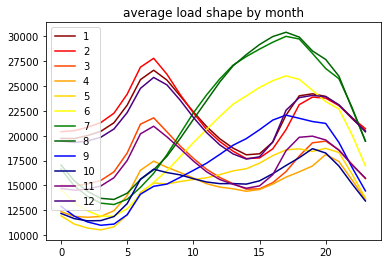

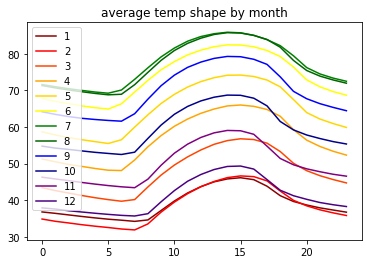

In [4]:
for month in range(1,13) :
    loads_temp = loads[loads['load_month'] == month]
    loads_temp = loads_temp[loads_temp['load_zone_id'] == 1]
    avg = np.average(loads_temp.iloc[:,4:28],axis=0)
    plt.plot(avg,label = month,c=season_colors[month])

plt.title('average load shape by month')
plt.legend()
plt.show()
    
for month in range(1,13) :
    temps_temp = temps[temps['temp_month'] == month] 
    avg = np.average(temps_temp.iloc[:,4:28],axis=0)
    plt.plot(avg,label = month,c=season_colors[month])

plt.title('average temp shape by month')
plt.legend()
plt.show()
    
    

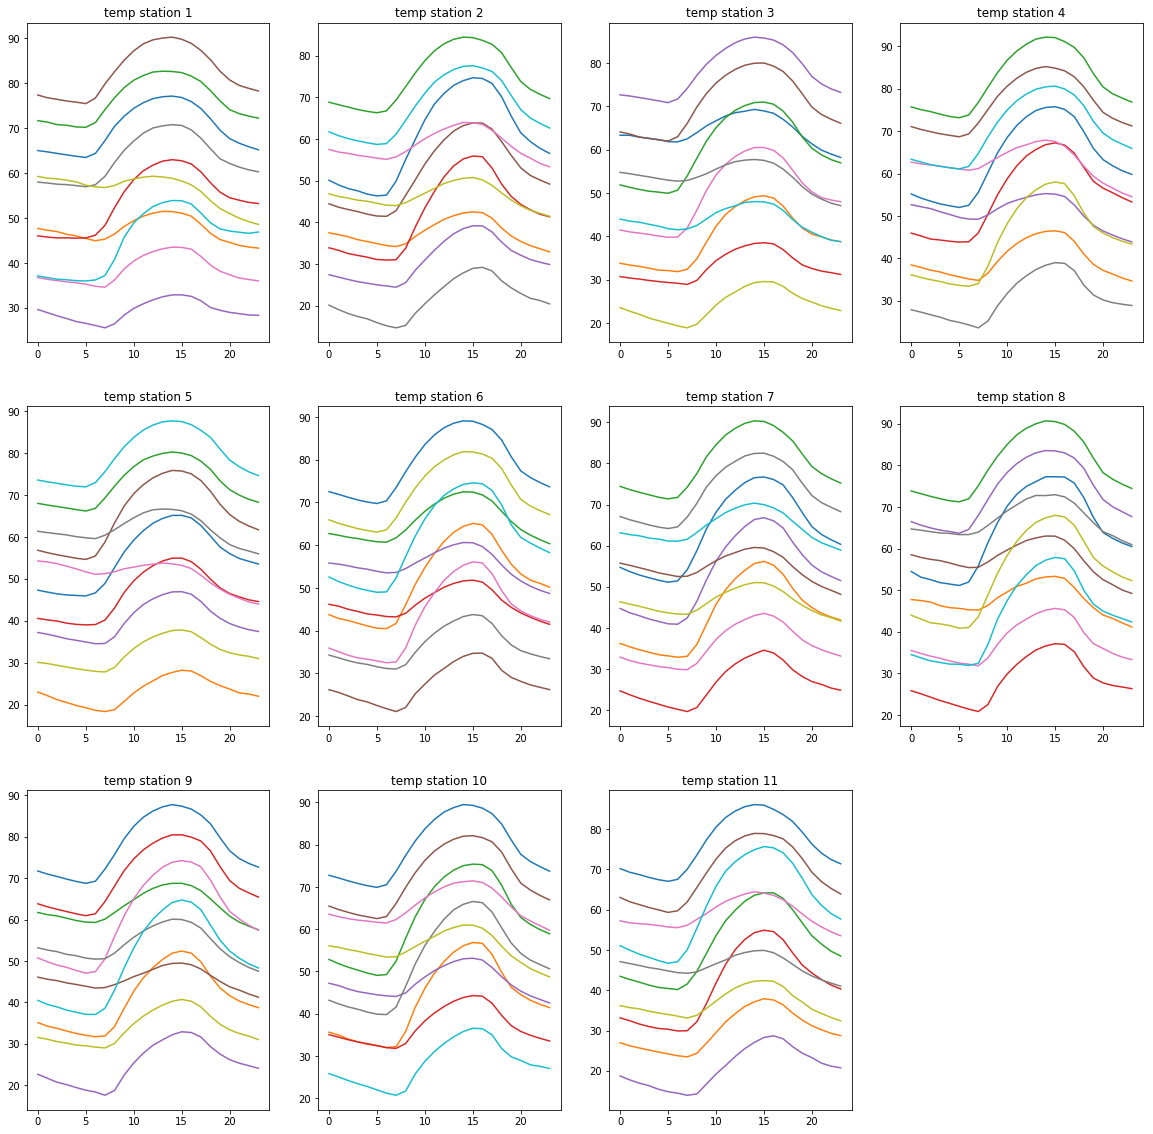

In [5]:
from sklearn import linear_model, preprocessing
from sklearn.cluster import KMeans
import matplotlib.gridspec as gridspec


### k-means clustering of temperature trends for each temp station
gs = gridspec.GridSpec(3, 4)
fig = plt.figure(figsize = (20,20))

plot_positon = 0

for i in range(1,12) :
    temps_temp = temps[temps['temp_station_id'] == i]

    kmeans = KMeans(n_clusters=10, random_state=0).fit(temps_temp.iloc[:,4:28])
    ax1 = fig.add_subplot(gs[int(plot_positon/4),plot_positon%4])
    plt.plot(np.matrix.transpose(kmeans.cluster_centers_))
    plot_positon +=1
    plt.title('temp station ' + str(i))

plt.show()

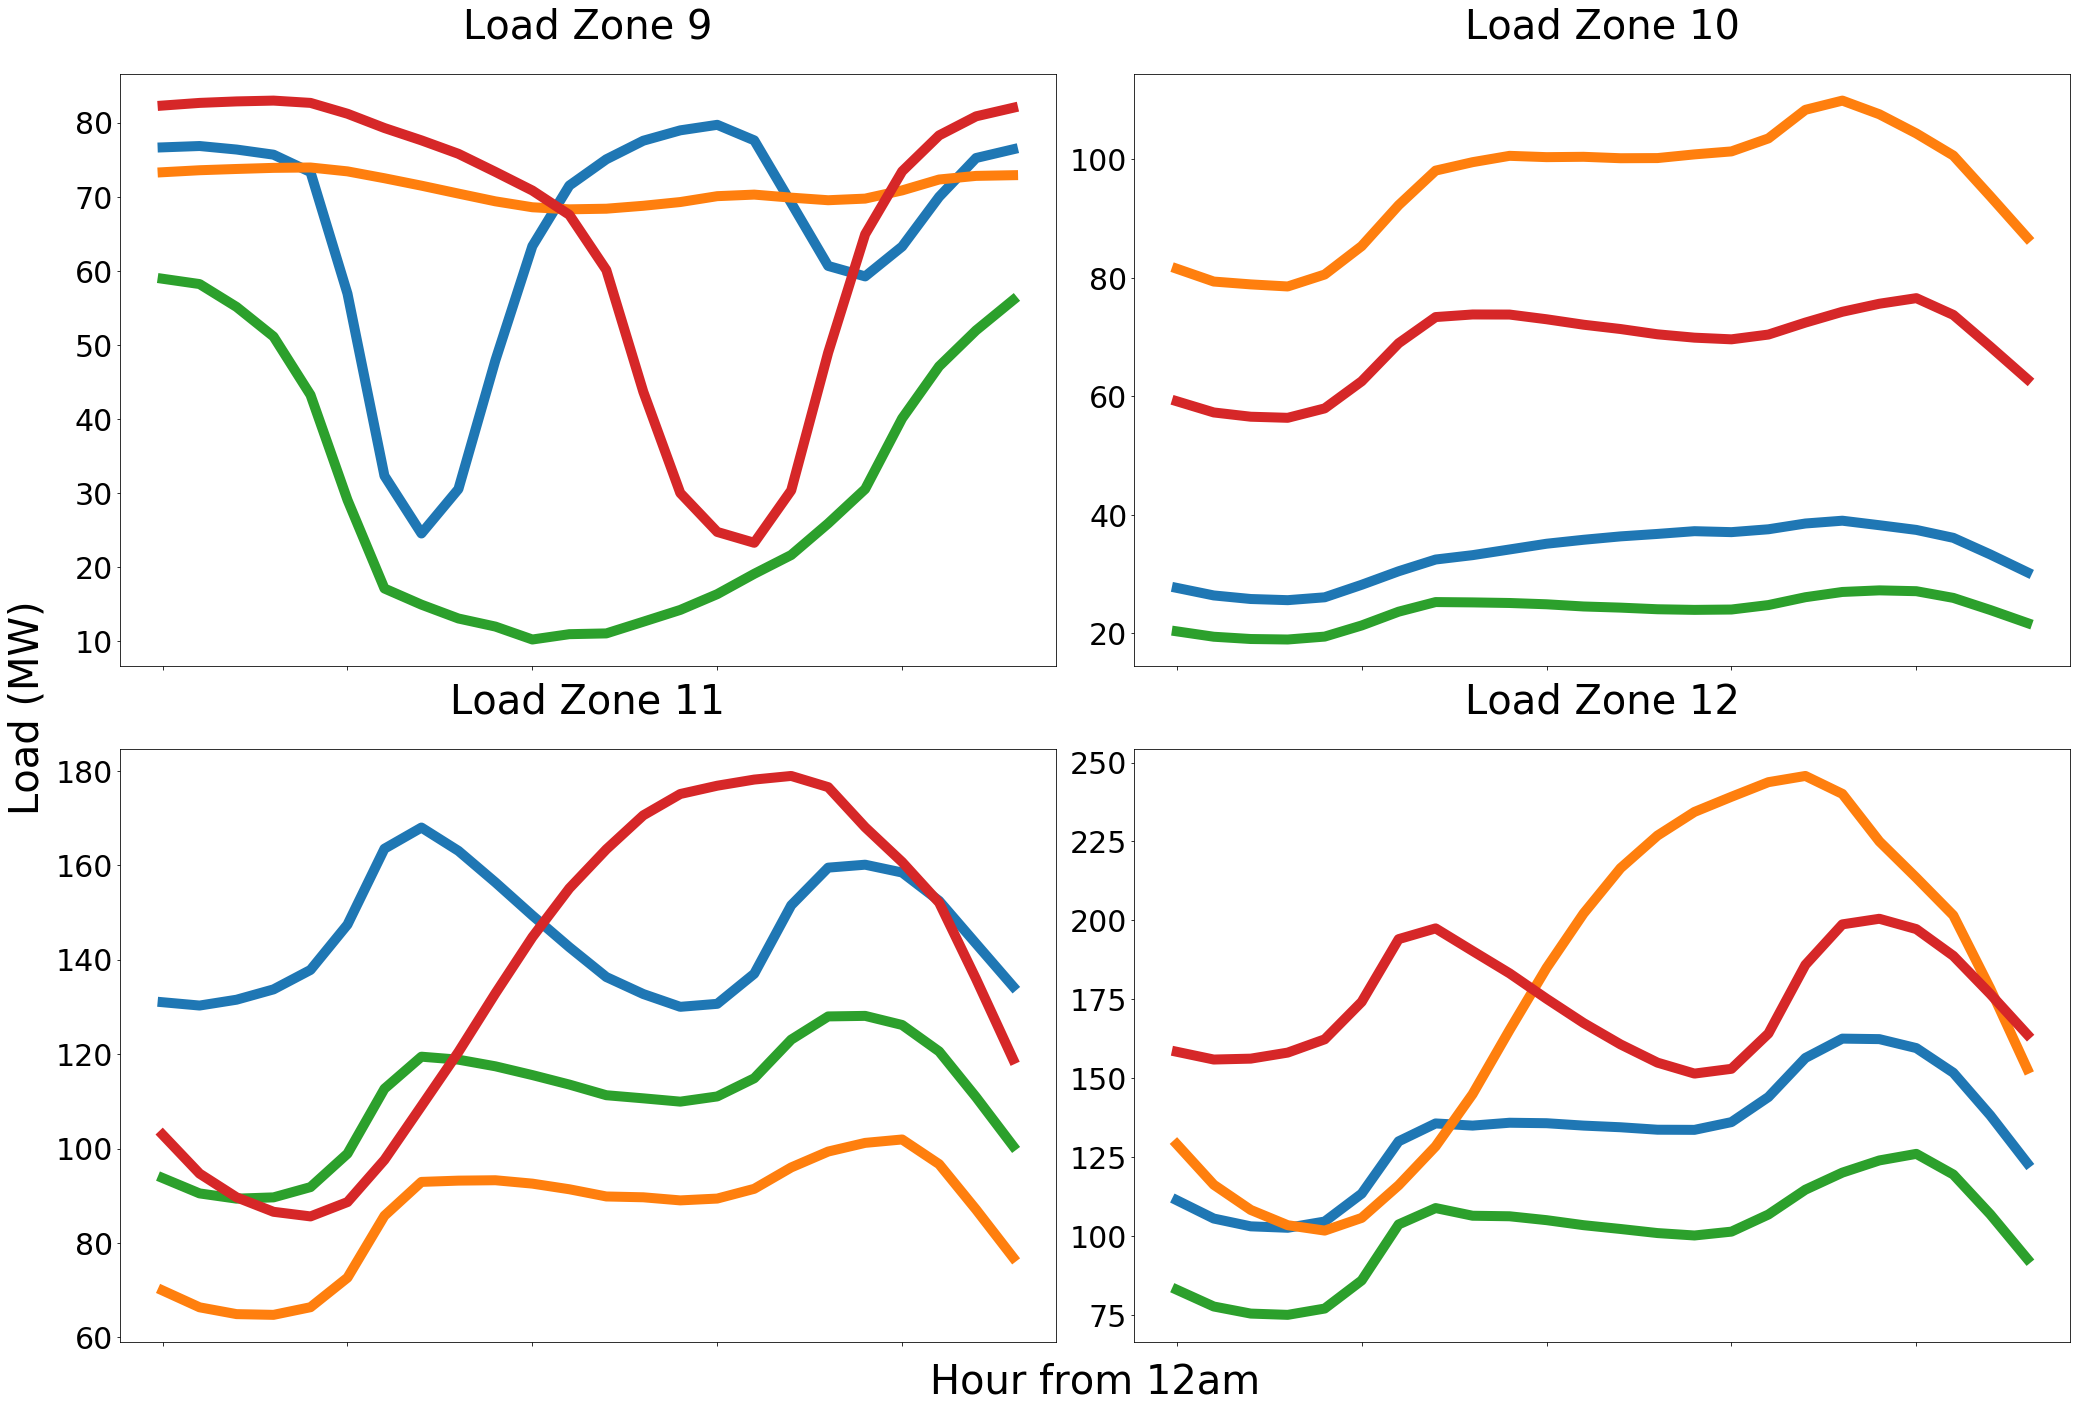

In [95]:
from sklearn import linear_model, preprocessing
from sklearn.cluster import KMeans
from matplotlib.ticker import FuncFormatter

### k-means clustering of load trends for each load zone 
plt.clf()
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize = (30,20))
ax = fig.add_subplot(111)
ax.set_xlabel('Hour from 12am', fontsize = 40)
ax.set_ylabel('Load (MW)', fontsize = 40, labelpad = 50)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')


plot_positon = 0

max_load = 300000

for i in [9, 10, 11, 12]:
    loads_temp = loads[loads['load_zone_id'] == i]

    kmeans = KMeans(n_clusters=4, random_state=0).fit(loads_temp.iloc[:,4:28])
    centers = kmeans.cluster_centers_
    for k in range(len(centers)):
        for p in range(len(centers[k])):
            centers[k][p] /= 1000
    ax1 = fig.add_subplot(gs[int(plot_positon/2),plot_positon%2])
    #top = int(round(max([max(kmeans.cluster_centers_[m]) for m in range(len(kmeans.cluster_centers_))]), -3))
    #bot = int(round(min([min(kmeans.cluster_centers_[m]) for m in range(len(kmeans.cluster_centers_))]), -3))
    plt.plot(np.matrix.transpose(centers), linewidth = 10)
    plt.tight_layout()
    
    ax1.tick_params( labelbottom='off', labelsize = 30)
    
    #plt.xlabel('min: {}, max: {}'.format(bot, top), fontsize=30)
    plot_positon +=1
    #plt.ylim((0,250000))
    ax1.get_yaxis().set_major_formatter(
        FuncFormatter(lambda x, p: format(int(x), ',')))
    #ax1.set_yticklabels([])
    plt.title('Load Zone {}'.format(i), fontsize=40, y = 1.05)
    
#plt.ylabel('kW', fontsize=20)
plt.savefig('load_profiles.png')
plt.show()

In [73]:
k

0